In [ ]:
import pandas as pd
import random
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = pd.read_csv("reviews.csv", sep=",")
dataset

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address
0,1,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0,0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",8/31/15,1440987567,193.93.167.87
1,2,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0,1,N,Y,five star,it's great,8/31/15,1441001998,193.93.167.87
2,3,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0,0,N,Y,great cables,These work great and fit my life proof case fo...,8/31/15,1440959483,193.93.167.87
3,4,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0,0,N,Y,Work very well,Work very well,8/31/15,1441015251,193.93.167.87
4,5,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0,0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",8/31/15,1440973308,205.10.168.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88527,88528,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23,27,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",4/3/02,1017782265,201.30.21.211
88528,88529,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10,11,N,N,Well worth [it],We live in an apartment with hardwood floors a...,3/5/02,1015341480,216.59.233.79
88529,88530,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13,13,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2/19/02,1014068234,209.193.182.91
88530,88531,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58,61,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,1/6/02,1010282341,205.32.108.104


In [ ]:
# Add a new column 'Target' and initialize it with 'Real'
dataset['Target'] = 'Real'

In [ ]:
print(dataset.columns)

Index(['Unnamed: 0', 'marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'timestamp',
       'IP Address', 'Target'],
      dtype='object')


In [ ]:
dataset

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address,Target
0,1,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0,0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",8/31/15,1440987567,193.93.167.87,Real
1,2,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0,1,N,Y,five star,it's great,8/31/15,1441001998,193.93.167.87,Real
2,3,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0,0,N,Y,great cables,These work great and fit my life proof case fo...,8/31/15,1440959483,193.93.167.87,Real
3,4,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0,0,N,Y,Work very well,Work very well,8/31/15,1441015251,193.93.167.87,Real
4,5,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0,0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",8/31/15,1440973308,205.10.168.66,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88527,88528,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23,27,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",4/3/02,1017782265,201.30.21.211,Real
88528,88529,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10,11,N,N,Well worth [it],We live in an apartment with hardwood floors a...,3/5/02,1015341480,216.59.233.79,Real
88529,88530,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13,13,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2/19/02,1014068234,209.193.182.91,Real
88530,88531,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58,61,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,1/6/02,1010282341,205.32.108.104,Real


In [ ]:
# Sample data for creating the classifier and vectorizer
sample_texts = ["This product is great", "Terrible product", "I love this", "I hate this"]
sample_labels = [1, 0, 1, 0]  # 1 for positive, 0 for negative

In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf.fit(sample_texts)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [ ]:
clf = LogisticRegression()
clf.fit(tfidf.transform(sample_texts), sample_labels)

def getSentiment(text):

    text = str(text)
    text = text.lower()
    text = re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)

    text = re.sub(r"\W"," ",text)
    text = re.sub(r"\d"," ",text)
    text = re.sub(r"\s+[a-z]\s+"," ",text)
    text = re.sub(r"^[a-z]\s+"," ",text)
    text = re.sub(r"\s+[a-z]$"," ",text)
    text = re.sub(r"\s+"," ",text)

    sent = clf.predict(tfidf.transform([text]).toarray())

    return sent[0]

## 1. Reviews with Conflicting Views

In [ ]:
fake_count = 0

for i, row in dataset.iterrows():
    if getSentiment(row['review_headline']) != getSentiment(row['review_body']):
        dataset.at[i, 'Target'] = 'Fake'
        fake_count += 1

print("Number of reviews marked as 'Fake':", fake_count)


Number of reviews marked as 'Fake': 23417


# 2. Brand Bias by Individual Users

In [ ]:
customers = dataset.groupby("customer_id")
customer_list = dataset["customer_id"].unique()

for customer_id in customer_list:
    brand_df = customers.get_group(customer_id)
    brands = brand_df.groupby("product_parent")
    brands_list = brand_df["product_parent"].unique()

    for brand in brands_list:
        product_df = brands.get_group(brand)
        no_of_products = len(product_df)

        if no_of_products <= 2:
            continue

        indices = product_df.index.values.tolist()
        sentiment = getSentiment(product_df["review_body"].iloc[0])
        isSameSentiment = True

        if no_of_products < 4:
            continue

        for k in range(1, no_of_products):
            text = str(product_df["review_body"].iloc[k])

            if getSentiment(text) != sentiment:
                isSameSentiment = False
                break

        if isSameSentiment:
            dataset.loc[indices, 'Target'] = 'Fake'
            break

print("Number of reviews/customers marked as fake:", len(dataset[dataset['Target'] == 'Fake']))


Number of reviews/customers marked as fake: 23422


# 3. Brand Bias from the Same IP Address

In [ ]:
fake_ip_addresses = set()

ip_groups = dataset.groupby("IP Address")

for ip_address, ip_group in ip_groups:
    brand_groups = ip_group.groupby("product_parent")

    for brand, brand_group in brand_groups:
        if len(brand_group) <= 2:
            continue

        first_review_sentiment = getSentiment(brand_group.iloc[0]["review_body"])

        all_same_sentiment = all(getSentiment(review["review_body"]) == first_review_sentiment for _, review in brand_group.iterrows())

        if all_same_sentiment:
            dataset.loc[brand_group.index, 'Target'] = 'Fake'
            fake_ip_addresses.add(ip_address)

print("Fake IP addresses:", fake_ip_addresses)


Fake IP addresses: {'205.10.168.66'}


# 4. Review Flooding by a Single User

In [ ]:
dataset.sort_values("customer_id",inplace=True)

In [ ]:
print(dataset['review_date'].isnull().sum())

0


In [ ]:
dataset = dataset.dropna(subset=['review_date'])

In [ ]:
dataset['review_date'] = pd.to_datetime(dataset['review_date'], errors='coerce')


<ipython-input-74-a8b6f17e3724>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['review_date'] = pd.to_datetime(dataset['review_date'], errors='coerce')


In [ ]:
print(dataset['review_date'].isnull().sum())
dataset = dataset.dropna(subset=['review_date'])


0


In [ ]:
dataset.sort_values("customer_id", inplace=True)
customer_group = dataset.groupby("customer_id")
customer_group_list = dataset["customer_id"].unique().tolist()

fake_reviews_count = 0

for customer_id in customer_group_list:
    customer_reviews = customer_group.get_group(customer_id)
    reviews_by_date = customer_reviews.groupby("review_date")

    for review_date, date_group in reviews_by_date:
        reviews_by_date_for_pos = []
        reviews_by_date_for_neg = []

        for idx, review in date_group.iterrows():
            text = review["review_body"]
            sentiment = getSentiment(text)

            if sentiment == 0:
                reviews_by_date_for_neg.append(idx)
            else:
                reviews_by_date_for_pos.append(idx)

        if len(reviews_by_date_for_pos) > 3:
            dataset.loc[reviews_by_date_for_pos, 'Target'] = 'Fake'
            fake_reviews_count += len(reviews_by_date_for_pos)
        if len(reviews_by_date_for_neg) > 3:
            dataset.loc[reviews_by_date_for_neg, 'Target'] = 'Fake'
            fake_reviews_count += len(reviews_by_date_for_neg)


print("Number of reviews marked as 'Fake':", fake_reviews_count)

Number of reviews marked as 'Fake': 108


# 5. Mass Posting from a Single IP Address

In [ ]:
fake_review_indices = set()

ip_group = dataset.groupby("IP Address")

for ip_address, reviews in ip_group:
    reviews_by_date = reviews.groupby("review_date")

    for date, reviews_for_each_day in reviews_by_date:
        reviews_by_date_for_pos = []
        reviews_by_date_for_neg = []

        for index, review in reviews_for_each_day.iterrows():
            sentiment = getSentiment(review["review_body"])

            if sentiment == 0:
                reviews_by_date_for_neg.append(index)
            else:
                reviews_by_date_for_pos.append(index)

        if len(reviews_by_date_for_pos) > 3:
            fake_review_indices.update(reviews_by_date_for_pos)
        if len(reviews_by_date_for_neg) > 3:
            fake_review_indices.update(reviews_by_date_for_neg)

for index in fake_review_indices:
    dataset.at[index, 'Target'] = 'Fake'

print("Number of reviews to be marked as 'Fake':", len(fake_review_indices))

Number of reviews to be marked as 'Fake': 4


# 6. Simultaneous Similar Reviews

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dataset.sort_values("timestamp", inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
def only_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords.words("english")]
    return len(words) == 0

In [ ]:
for i in range(len(dataset)):
    reviews = [str(dataset["review_body"][i])]

    try:
        tfidf_vectorizer.fit_transform(reviews)
    except:
        dataset.at[i, 'Target'] = 'Fake'
        continue

    time = dataset["timestamp"][i]
    for j in range(i + 1, len(dataset)):
        if dataset["timestamp"][j] - time <= 1800:
            reviews.append(str(dataset["review_body"][j]))
        else:
            break

    tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)
    tfidf_list = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix).tolist()

    for k in range(1, len(tfidf_list[0])):
        if tfidf_list[0][k] > 0.6:
            dataset.at[i + k, 'Target'] = 'Fake'
            dataset.at[i, 'Target'] = 'Fake'

num_fake_reviews = len(dataset[dataset['Target'] == 'Fake'])
print("Number of reviews marked as 'Fake':", num_fake_reviews)

Number of reviews marked as 'Fake': 23680


# 7. Reviews with Coercive Language

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
initial_fake_count = dataset[dataset['Target'] == 'Fake'].shape[0]

for i, row in dataset.iterrows():
    words = word_tokenize(str(row['review_body']))
    tagged_words = pos_tag(words)

    nouns_count = sum(1 for word, tag in tagged_words if tag.startswith("NN"))
    verbs_count = sum(1 for word, tag in tagged_words if tag.startswith("VB"))

    if verbs_count > nouns_count:
        dataset.at[i, 'Target'] = 'Fake'

final_fake_count = dataset[dataset['Target'] == 'Fake'].shape[0]
new_fake_count = final_fake_count - initial_fake_count

print("Number of new reviews marked as 'Fake' in this step:", new_fake_count)
print("Total number of reviews marked as 'Fake':", final_fake_count)

Number of new reviews marked as 'Fake' in this step: 19546
Total number of reviews marked as 'Fake': 43226


# 8. Personal Narratives in Reviews

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
first_person_pronouns = {"i", "we", "me", "us", "my", "mine", "our", "ours"}

for i, row in dataset.iterrows():
    review_body = str(row["review_body"]).lower()

    words = word_tokenize(review_body)
    sentences = sent_tokenize(review_body)

    pronoun_count = sum(1 for word in words if word in first_person_pronouns)

    if len(sentences) > 4 and pronoun_count > len(sentences) / 2:
        dataset.at[i, 'Target'] = 'Fake'

num_fake_reviews = len(dataset[dataset['Target'] == 'Fake'])
print("Number of reviews marked as 'Fake':", num_fake_reviews)

Number of reviews marked as 'Fake': 35033


# 9. Nonsensical Text in Reviews

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords, wordnet

In [ ]:
dataset.reset_index(inplace=True)
dataset.set_index("review_id", inplace=True)

In [ ]:
def LSA(text):
    vectorizer = TfidfVectorizer()
    try:
        X = vectorizer.fit_transform(text)
    except ValueError:
        return [0] * len(text)
    if X.shape[1] < 2:
        return [0] * len(text)
    lsa = TruncatedSVD(n_components=1, n_iter=100)
    lsa.fit(X)
    terms = vectorizer.get_feature_names_out()
    concept_words = {}

    for j, comp in enumerate(lsa.components_):
        componentTerms = zip(terms, comp)
        sortedTerms = sorted(componentTerms, key=lambda x: x[1], reverse=True)
        sortedTerms = sortedTerms[:10]
        concept_words[str(j)] = sortedTerms

    sentence_scores = []
    for key in concept_words.keys():
        for sentence in text:
            words = nltk.word_tokenize(sentence)
            scores = 0
            for word in words:
                for word_with_scores in concept_words[key]:
                    if word == word_with_scores[0]:
                        scores += word_with_scores[1]
            sentence_scores.append(scores)
    return sentence_scores


In [ ]:
unique_products = dataset['product_id'].unique()
product_df = dataset.groupby('product_id')

In [ ]:
for product_id in unique_products:
    df = product_df.get_group(product_id)
    reviews = df["review_body"].apply(lambda x: re.sub(r"\W", " ", str(x)))
    reviews = reviews.apply(lambda x: re.sub(r"\d", " ", x))
    reviews = reviews.apply(lambda x: re.sub(r"\s+[a-z]\s+", " ", x))
    reviews = reviews.apply(lambda x: re.sub(r"^\s+[a-z]\s+", " ", x))
    reviews = reviews.apply(lambda x: re.sub(r"\s+[a-z]$", " ", x))
    reviews = reviews.apply(lambda x: re.sub(r"\s+", " ", x))

    filtered_reviews = reviews[reviews.apply(lambda x: len(nltk.word_tokenize(x)) > 1)]
    if filtered_reviews.empty:
        continue

    review_ids = filtered_reviews.index

    sentence_scores = LSA(filtered_reviews.tolist())

    for i, score in enumerate(sentence_scores):
        if score == 0:
            dataset.at[review_ids[i], 'Target'] = 'Fake'

print("Number of reviews marked as 'Fake':", len(dataset[dataset['Target'] == 'Fake']))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / ful

Number of reviews marked as 'Fake': 38206


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


In [ ]:
len(remove_reviews)

5120

In [ ]:
dataset.to_csv("dataset.csv", sep="\t")

In [ ]:
dataset

,index,Unnamed: 0,marketplace,customer_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address,Target
review_id,,,,,,,,,,,,,,,,,,,
R44WS2RSQQ0HR,0,88532,US,47099634,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,4,37,38,N,N,no smell has to mean it is getting the job don...,I purchased this about three weeks ago along w...,2001-12-22,1009025704,222.92.68.154,Fake
R227G6T5B26DVC,1,88531,US,38528439,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58,61,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,2002-01-06,1010282341,205.32.108.104,Fake
R1GHKKZMHAHQC1,2,88530,US,50891675,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13,13,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2002-02-19,1014068234,209.193.182.91,Fake
R1DVLTZFXXOX9,3,88529,US,51697602,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10,11,N,N,Well worth [it],We live in an apartment with hardwood floors a...,2002-03-05,1015341480,216.59.233.79,Fake
R2CDRVDUKB5Z9P,4,88528,US,38978459,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23,27,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",2002-04-03,1017782265,201.30.21.211,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R104MY31OKNGXH,88527,28,US,48148197,B00PAP68WO,366592530,Foxnovo 3.7V 380mAh 25C Rechargeable Lipo Batt...,Mobile_Electronics,5,0,0,N,Y,Five Stars,Met my application needs very well.,2015-08-31,1441039642,220.152.148.128,Real
R3EQYRGIIJQBHT,88528,29,US,133451,B0105XU088,673736961,AUSDOM AD170 Car DVR Dashboard Camcorder + G-S...,Mobile_Electronics,5,0,1,N,N,I like it so much !!,This dash cam gives me life. I am an african a...,2015-08-31,1441040447,212.190.95.199,Fake
R2EJI73CFP0N1Q,88529,40,US,37645678,B00VBBLOJI,43604968,"Bluetooth Transmitter, AUKEY Portable Wireless...",Mobile_Electronics,5,0,0,N,Y,"Great range, about 30-50 feet","Great range, about 30-50 feet, very clear, wor...",2015-08-31,1441041706,198.250.112.124,Real


In [ ]:
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn .svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataframe = pd.read_csv('dataset.csv', sep="\t")

In [ ]:
dataframe.dropna(inplace=True)
dataframe['Length'] = dataframe['review_body'].apply(len)

In [ ]:
def convertmyTxt(rv):
    np = [c for c in rv if c not in string.punctuation]
    np = ''.join(np)
    return [w for w in np.split() if w.lower() not in stopwords.words('english')]

In [ ]:
dataframe['Stop Words'] = dataframe.apply(lambda x: convertmyTxt(x['review_body']), axis=1)

In [ ]:
def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))
dataframe['all_text'] = dataframe.apply(lambda x: rejoin_words(x['Stop Words']), axis=1)

In [ ]:
dataframe.to_csv('FakeReview.csv')

In [ ]:
dataframe = pd.read_csv('FakeReview.csv')

In [ ]:
print(dataframe.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'category', 'rating',
       'LABEL', 'Target', 'review_body', 'Length', 'Stop Words', 'all_text'],
      dtype='object')


In [ ]:
dataframe = dataframe.dropna(subset=["Target", "all_text"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataframe['all_text'],dataframe['Target'], test_size= 0.2,random_state=42 )
print("X Train \n",x_train,"Y Train\n", y_train,"X Test\n", x_test,"Y Test\n", y_test)

X Train 
 20355            needed whole lot little would order extra
27881    given ARC exchange honest review really enjoye...
21349    ingredients list makes happy problem kind hard...
29639    Really interesting look Pinkers relationship c...
18760    upgrading plumbing fixtures one bathrooms noti...
                               ...                        
6265     usually shoot multiple weapons thought would l...
11284    Supper bright litium battery whats love light ...
38159    usually drive 35 miles one way purchase orderi...
860      Great playroom multiple children fits bit ever...
15795    Looks great made quality material problem come...
Name: all_text, Length: 32344, dtype: object Y Train
 20355    Fake
27881    Fake
21349    Fake
29639    Fake
18760    Real
         ... 
6265     Fake
11284    Real
38159    Real
860      Real
15795    Fake
Name: Target, Length: 32344, dtype: object X Test
 27957    Eva find way escape abusive mother meets hands...
39755    second Glamori

# LOGISTIC REGGRESSION

In [ ]:
pipe = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
logRg = pipe.predict(x_test)
print(logRg)

['Fake' 'Fake' 'Real' ... 'Fake' 'Real' 'Real']


In [ ]:
test = pd.Series(["Got the 256GB version at 21k and it is really worth the price. Camera can be slightly better but battery backup and other features are really good and worthy for the price paid.","I ordered F 19 pro two times one delivered in May and another in Aug. Only after receiving the second F19 Pro , I realized that first phone packet did not have the the earbuds headphone. I request that I be supplied the earbuds deficient in the first order. Also while confirming the dispatch, pls mention list of supplied items.","Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty","The Oppo F19 Pro+ 5G is a solid mid-range offering that delivers impressive performance and an attractive design"])
pred = pipe.predict(test)
for x in pred:
    print(x)

Real
Real
Fake
Real


Accuracy of the model:  88.25%
Precision 0.8599
Recall 0.8993
F1 Score :  0.8791


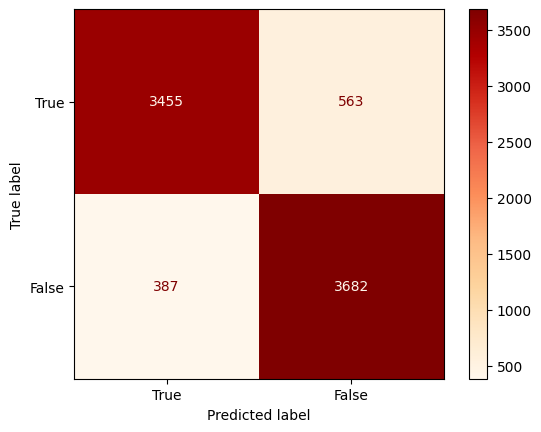

In [ ]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,logRg)*100,2)) + '%')
accuracy_lR = (np.round(accuracy_score(y_test,logRg)*100,2))
listlR = metrics.confusion_matrix(y_test,logRg)
TP = listlR[0][0]
FP = listlR[0][1]
FN = listlR[1][0]
TN = listlR[1][1]
precision_lR = (TP/(FP+TP))
print("Precision",np.round(precision_lR,4))
recall_lR = (TP/(FN+TP))
print("Recall",np.round(recall_lR,4))
F1Score_lR = 2*precision_lR*recall_lR/(precision_lR + recall_lR)
print("F1 Score : ",np.round(F1Score_lR,4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = listlR, display_labels = [True,False])
cm_display.plot(cmap="OrRd")
plt.show()

# SUPPORT VECTOR MACHINE

In [ ]:
pipel = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipel.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [ ]:
svc = pipel.predict(x_test)
print(svc)

['Fake' 'Fake' 'Real' ... 'Fake' 'Real' 'Real']


In [ ]:
test = pd.Series(["Got the 256GB version at 21k and it is really worth the price. Camera can be slightly better but battery backup and other features are really good and worthy for the price paid.","I ordered F 19 pro two times one delivered in May and another in Aug. Only after receiving the second F19 Pro , I realized that first phone packet did not have the the earbuds headphone. I request that I be supplied the earbuds deficient in the first order. Also while confirming the dispatch, pls mention list of supplied items.","Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty","The Oppo F19 Pro+ 5G is a solid mid-range offering that delivers impressive performance and an attractive design"])
pred = pipe.predict(test)
for x in pred:
    print(x)

Real
Real
Fake
Real


Accuracy of the model:  89.61%
Precision 0.8698
Recall 0.9168
F1 Score :  0.8927


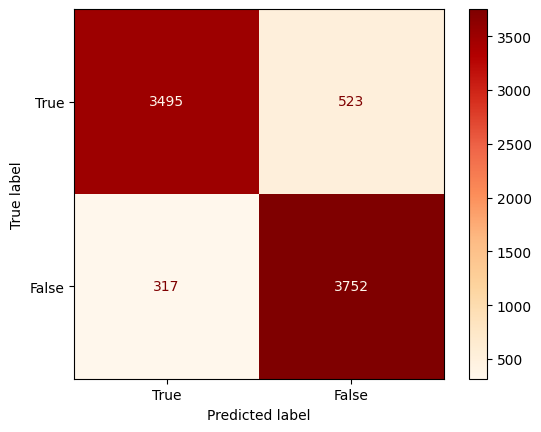

In [ ]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,svc)*100,2)) + '%')
accuracy_svc = (np.round(accuracy_score(y_test,svc)*100,2))
listSvc = metrics.confusion_matrix(y_test,svc)
TP = listSvc[0][0]
FP = listSvc[0][1]
FN = listSvc[1][0]
TN = listSvc[1][1]
precision_svc = (TP/(FP+TP))
print("Precision",np.round(precision_svc,4))
recall_svc = (TP/(FN+TP))
print("Recall",np.round(recall_svc,4))
F1Score_svc = 2*precision_svc*recall_svc/(precision_svc + recall_svc)
print("F1 Score : ",np.round(F1Score_svc,4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = listSvc, display_labels = [True,False])
cm_display.plot(cmap="OrRd")
plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:
pip = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pip.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc = pip.predict(x_test)
print(rfc)

['Fake' 'Fake' 'Real' ... 'Fake' 'Real' 'Real']


In [ ]:
test = pd.Series(["Got the 256GB version at 21k and it is really worth the price. Camera can be slightly better but battery backup and other features are really good and worthy for the price paid.","I ordered F 19 pro two times one delivered in May and another in Aug. Only after receiving the second F19 Pro , I realized that first phone packet did not have the the earbuds headphone. I request that I be supplied the earbuds deficient in the first order. Also while confirming the dispatch, pls mention list of supplied items.","Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty","The Oppo F19 Pro+ 5G is a solid mid-range offering that delivers impressive performance and an attractive design"])
pred = pip.predict(test)
for x in pred:
    print(x)

Real
Real
Fake
Fake


Accuracy of the model:  85.57%
Precision 0.8965
Recall 0.8275
F1 Score :  0.8606


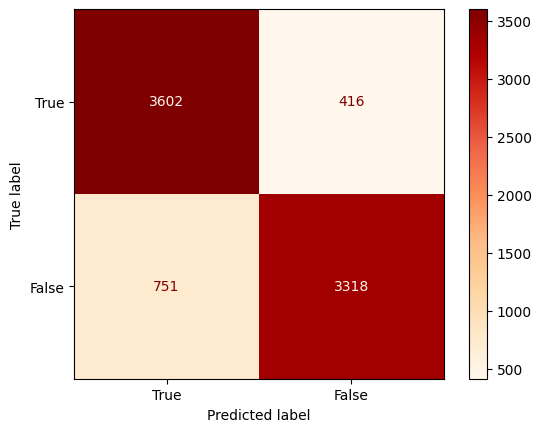

In [ ]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,rfc)*100,2)) + '%')
listt = metrics.confusion_matrix(y_test,rfc)
accuracy_rfc = (np.round(accuracy_score(y_test,rfc)*100,2))
TP = listt[0][0]
FP = listt[0][1]
FN = listt[1][0]
TN = listt[1][1]
precision_rfc = (TP/(FP+TP))
print("Precision",np.round(precision_rfc,4))
recall_rfc = (TP/(FN+TP))
print("Recall",np.round(recall_rfc,4))
F1Score_rfc = (2*precision_rfc*recall_rfc)/(precision_rfc + recall_rfc)
print("F1 Score : ",np.round(F1Score_rfc,4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = listt, display_labels = [True,False])
cm_display.plot(cmap="OrRd")
plt.show()

In [ ]:
dataa = {
    "labels" : ["RandomForestClassifier", "Logistic Regression", "SVC"],
    "accuracies" : [accuracy_rfc, accuracy_lR, accuracy_svc],
    "f1_scores" : [(F1Score_rfc*100), (F1Score_lR*100), (F1Score_svc*100)]
}
dff = pd.DataFrame(dataa)
fig, ax = plt.subplots()
# Use pandas plotting with 'bar' kind
dff.plot(x="labels", kind="bar", stacked=False, ax=ax)
# Add labels and title
plt.show()

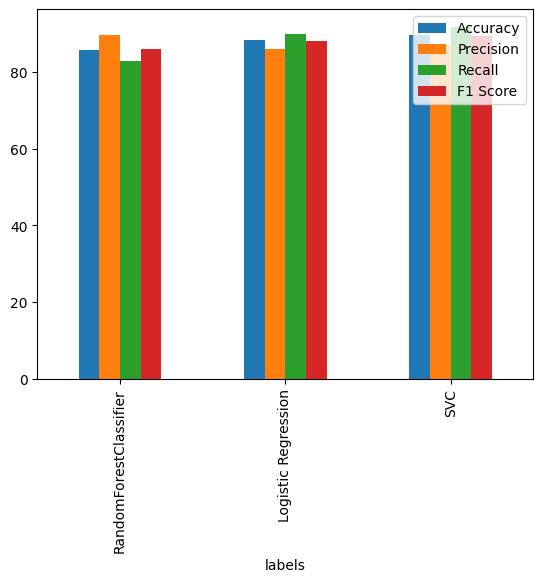

In [ ]:
data = {
    "labels": ["RandomForestClassifier", "Logistic Regression", "SVC"],
    "Accuracy": [accuracy_rfc, accuracy_lR, accuracy_svc],
    "Precision": [precision_rfc*100, precision_lR*100, precision_svc*100],
    "Recall": [recall_rfc*100, recall_lR*100, recall_svc*100],
    "F1 Score": [F1Score_rfc*100, F1Score_lR*100, F1Score_svc*100]  # F1 scores are already in percentage
}

dff = pd.DataFrame(data)
fig, ax = plt.subplots()
dff.plot(x="labels", kind="bar", stacked=False, ax=ax)
plt.show()

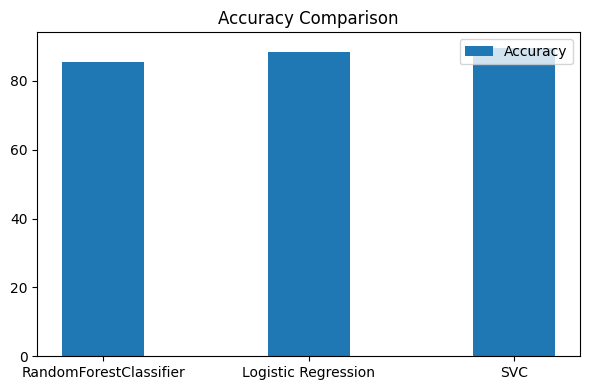

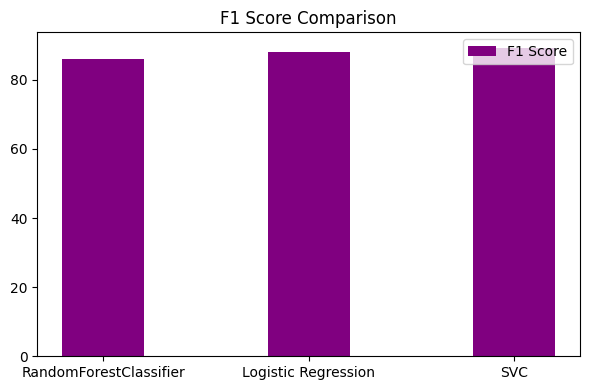

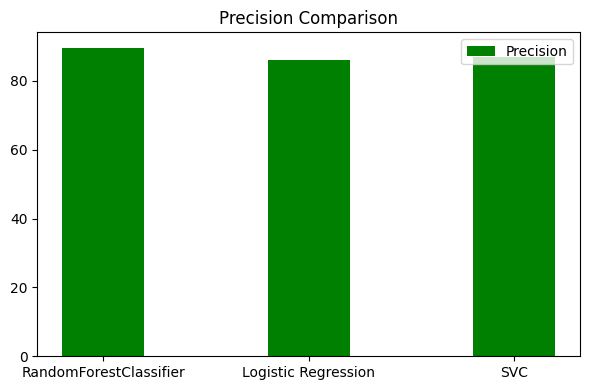

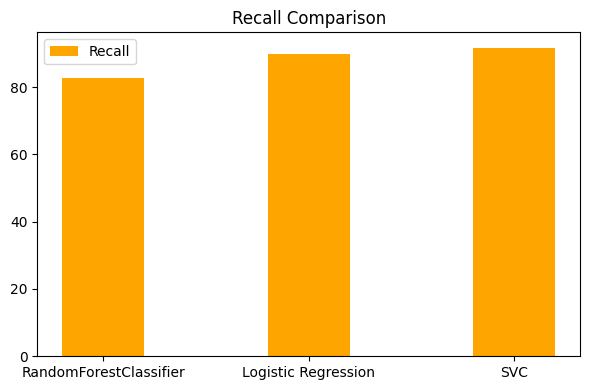

In [ ]:
accuracies = [accuracy_rfc, accuracy_lR, accuracy_svc]
f1_scores = [F1Score_rfc * 100, F1Score_lR * 100, F1Score_svc * 100]
precisions = [precision_rfc * 100, precision_lR * 100, precision_svc * 100]
recalls = [recall_rfc * 100, recall_lR * 100, recall_svc * 100]

labels = ["RandomForestClassifier", "Logistic Regression", "SVC"]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, label="Accuracy", width=0.4)
plt.title("Accuracy Comparison")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(labels, f1_scores, label="F1 Score", width=0.4, color="purple")
plt.title("F1 Score Comparison")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(labels, precisions, label="Precision", width=0.4, color="green")
plt.title("Precision Comparison")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(labels, recalls, label="Recall", width=0.4, color="orange")
plt.title("Recall Comparison")
plt.legend()
plt.tight_layout()
plt.show()